<a href="https://colab.research.google.com/github/MonishKoushalBusani/FMML_2024_Projects_and_Lab_Submissionss/blob/main/FMML_LAB_3(Excercise).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Modules

In [2]:
import numpy as np #for arrays
import matplotlib.pyplot as plt #for plots and graphs
from keras.datasets import mnist #for numbers
from sklearn.utils.extmath import cartesian #to generate cartesian product
from skimage.transform import rotate, AffineTransform, warp #for making argumentations(i.e changes)

rng = np.random.default_rng(seed=42) #for reproducibility and random number generation

Loading And Normalising Data

In [4]:
(train_X, train_y),(test_X, test_y) = mnist.load_data()

train_X = train_X / 255
test_X = test_X / 255

train_X = train_X[::1200, :, :].copy()  # subsample from images and labels
train_y = train_y[::1200].copy()    # x refers images y refers corresponding labels

Developing Functions

We use nearest neighbour algorithm that ultimately results in finding accuracy

Function **NN1**:

Calculates the Euclidean distance between the query point and each training point.
Finds the index of the nearest neighbor using np.argmin.
Returns the label of the nearest neighbor.

Function **NN**:

Reshapes the training and test data to have a single dimension.
Iterates over each test point, calling NN1 to predict its label.
Returns the array of predicted labels.

Function **Accuracy**:

Asserts that the lengths of the labels are equal.
Counts the number of correct predictions.
Calculates the accuracy by dividing the number of correct predictions by the total number of predictions.

In [5]:
def NN1(traindata, trainlabel, query):
    diff = (
        traindata - query
    )
    sq = diff * diff
    dist = sq.sum(1)
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    traindata = traindata.reshape(-1, 28*28)
    testdata = testdata.reshape(-1, 28*28)
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


def Accuracy(gtlabel, predlabel):
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()
    return correct / len(gtlabel)

Check the baseline accuracy on the test set without any augmentations.

In [8]:
testpred = NN(train_X, train_y, test_X)
print("Without augmentation baseline accuracy is",
      Accuracy(test_y, testpred)*100, "%")

Without augmentation baseline accuracy is 64.72 %


We have obtained an accuracy of about 64.72% before doing arguentations to the dataset.

Now we will make **argumentations**.

Let us make **roatatins** first....

We take 7 and 4 digits for roations and performed ratations with angles 10,20,30,40,50,-10,-20,-30,-40,-50,15,30,45,60,-15,-30,-45,-60  

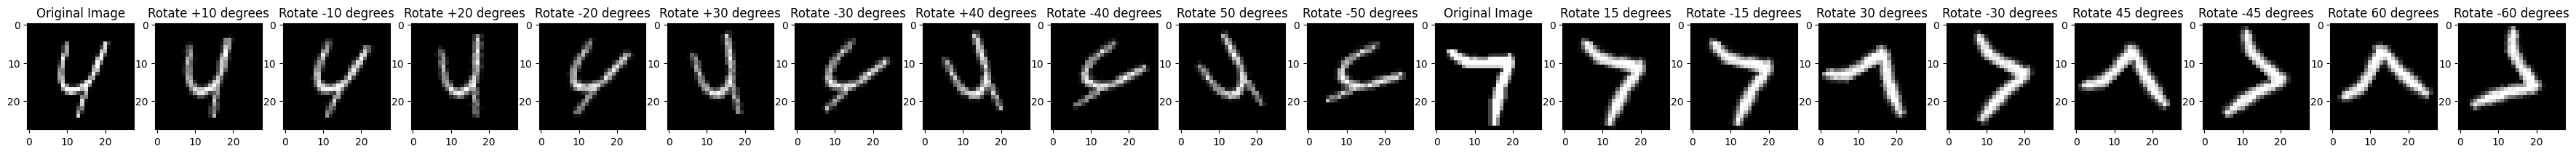

In [26]:
fig, axs = plt.subplots(1, 20, figsize=(45,45))

axs[0].imshow(train_X[7], cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(rotate(train_X[7], 10), cmap="gray")
axs[1].set_title("Rotate +10 degrees")

axs[2].imshow(rotate(train_X[7], -10), cmap="gray")
axs[2].set_title("Rotate -10 degrees")

axs[3].imshow(rotate(train_X[7], 20), cmap="gray")
axs[3].set_title("Rotate +20 degrees")

axs[4].imshow(rotate(train_X[7], -20), cmap="gray")
axs[4].set_title("Rotate -20 degrees")

axs[5].imshow(rotate(train_X[7], 30), cmap="gray")
axs[5].set_title("Rotate +30 degrees")

axs[6].imshow(rotate(train_X[7], -30), cmap="gray")
axs[6].set_title("Rotate -30 degrees")

axs[7].imshow(rotate(train_X[7], 40), cmap="gray")
axs[7].set_title("Rotate +40 degrees")

axs[8].imshow(rotate(train_X[7], -40), cmap="gray")
axs[8].set_title("Rotate -40 degrees")

axs[9].imshow(rotate(train_X[7], 50), cmap="gray")
axs[9].set_title("Rotate 50 degrees")

axs[10].imshow(rotate(train_X[7], -50), cmap="gray")
axs[10].set_title("Rotate -50 degrees")

axs[11].imshow(train_X[14], cmap="gray")
axs[11].set_title("Original Image")

axs[12].imshow(rotate(train_X[14], -15), cmap="gray")
axs[12].set_title("Rotate 15 degrees")

axs[13].imshow(rotate(train_X[14], -15), cmap="gray")
axs[13].set_title("Rotate -15 degrees")

axs[14].imshow(rotate(train_X[14], 30), cmap="gray")
axs[14].set_title("Rotate 30 degrees")

axs[15].imshow(rotate(train_X[14], -30), cmap="gray")
axs[15].set_title("Rotate -30 degrees")

axs[16].imshow(rotate(train_X[14], 45), cmap="gray")
axs[16].set_title("Rotate 45 degrees")

axs[17].imshow(rotate(train_X[14], -45), cmap="gray")
axs[17].set_title("Rotate -45 degrees")

axs[18].imshow(rotate(train_X[14], 60), cmap="gray")
axs[18].set_title("Rotate 60 degrees")

axs[19].imshow(rotate(train_X[14], -60), cmap="gray")
axs[19].set_title("Rotate -60 degrees")

plt.show()

We have obtained the images after rotations.For clarity about the roation angle zoom at the images. imshow() function helped in rotating the image.In this way we made some argumentations with rotations for the original image

In [27]:
def augRotate(sample, angleconstraint):
    if angleconstraint == 0:
        return sample
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)
    angle = rng.random(len(sample))
    angle = (angle - 0.5) * angleconstraint
    nsample = sample.copy()
    for ii in range(len(sample)):
        nsample[ii] = rotate(sample[ii], angle[ii])
    return np.squeeze(nsample)

We return the argumented sample within a specified argumented sample from the above **augRotate()** function with sample and angle constraint as parameters.

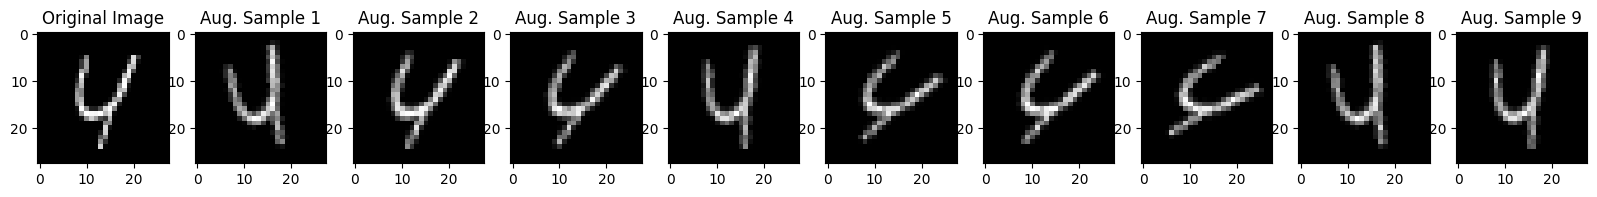

In [33]:
sample = train_X[7]
angleconstraint = 85

fig, axs = plt.subplots(1, 10, figsize=(20, 5))

axs[0].imshow(sample, cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[1].set_title("Aug. Sample 1")

axs[2].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[2].set_title("Aug. Sample 2")

axs[3].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[3].set_title("Aug. Sample 3")

axs[4].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[4].set_title("Aug. Sample 4")

axs[5].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[5].set_title("Aug. Sample 5")

axs[6].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[6].set_title("Aug. Sample 6")

axs[7].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[7].set_title("Aug. Sample 7")

axs[8].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[8].set_title("Aug. Sample 8")

axs[9].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[9].set_title("Aug. Sample 9")

plt.show()

From the above code we have given angle constraint as 85 degrees and obtatined various argumented samples from **train_x** images data for digit 4 within the angle constraint. We titled them as **Arg.Sample(x)** for x in range of 10.

In [38]:
angleconstraint = 50
naugmentations = 7

augdata = train_X
auglabel = train_y
for ii in range(naugmentations):
    augdata = np.concatenate(
        (augdata, augRotate(train_X, angleconstraint))
    )
    auglabel = np.concatenate(
        (auglabel, train_y)
    )

testpred = NN(augdata, auglabel, test_X)
print("Accuracy after rotation augmentation:", Accuracy(test_y, testpred)*100, "%")

Accuracy after rotation augmentation: 67.36 %


After making argumentations in dataset we obtained a slight change in acccuracy.i.e Our accuracy increased. Since 67.6 > 64.72 our samples are more perfect now and have more accuracy than previous one.

In [39]:
angleconstraints = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
accuracies = np.zeros(
    len(angleconstraints), dtype=float
)

for ii in range(len(angleconstraints)):
    augdata = train_X
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augRotate(train_X, angleconstraints[ii]))
        )
        auglabel = np.concatenate(
            (auglabel, train_y)
        )

    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        "Accuracy after rotation augmentation constrained by",
        angleconstraints[ii],
        "degrees is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )

Accuracy after rotation augmentation constrained by 0 degrees is 64.72 %
Accuracy after rotation augmentation constrained by 5 degrees is 66.58 %
Accuracy after rotation augmentation constrained by 10 degrees is 67.15 %
Accuracy after rotation augmentation constrained by 15 degrees is 67.86999999999999 %
Accuracy after rotation augmentation constrained by 20 degrees is 68.82000000000001 %
Accuracy after rotation augmentation constrained by 25 degrees is 67.41 %
Accuracy after rotation augmentation constrained by 30 degrees is 68.05 %
Accuracy after rotation augmentation constrained by 35 degrees is 67.69 %
Accuracy after rotation augmentation constrained by 40 degrees is 68.46 %
Accuracy after rotation augmentation constrained by 45 degrees is 67.46 %
Accuracy after rotation augmentation constrained by 50 degrees is 67.75 %
Accuracy after rotation augmentation constrained by 55 degrees is 67.31 %
Accuracy after rotation augmentation constrained by 60 degrees is 67.66 %
Accuracy after r

From the above operation we have obatined most accuracy incase of angle constarint **20 degrees** which is of **68.82000000000001 %**

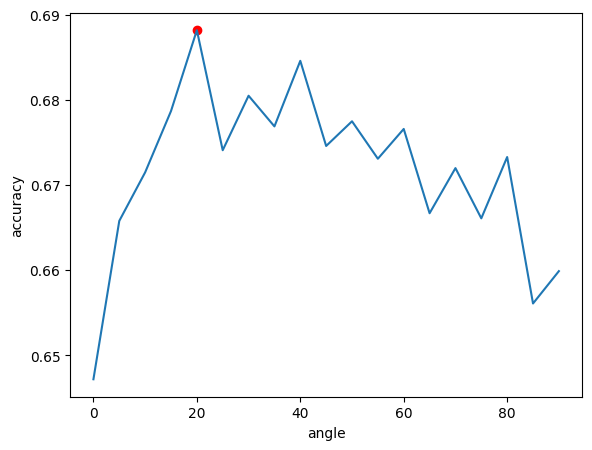

In [40]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(angleconstraints, accuracies)
ax.set_xlabel("angle")
ax.set_ylabel("accuracy")

maxind = np.argmax(accuracies)
plt.scatter(angleconstraints[maxind], accuracies[maxind], c="red")

From the above plot we can conclude that most accuracy is inacase of angle constraint as **20 degrees**

As we have gone through **rotation** argumentation let us go through **shear** argumentation now...

Function **shear** comprises of

**Steps**:
Create an **Affine** **Transform**,
**Warp** the Image,
**Centralize** the Image,
**Return** the Sheared Image

In [41]:
def shear(sample, amount):
    tform = AffineTransform(shear=amount)
    img = warp(sample, tform)

    col = img.sum(0).nonzero()[0]
    row = img.sum(1).nonzero()[0]
    if len(col) > 0 and len(row) > 0:
        xshift = int(sample.shape[0] / 2 - (row[0] + row[-1]) / 2)
        yshift = int(sample.shape[1] / 2 - (col[0] + col[-1]) / 2)
        img = np.roll(img, (xshift, yshift), (0, 1))
    return img

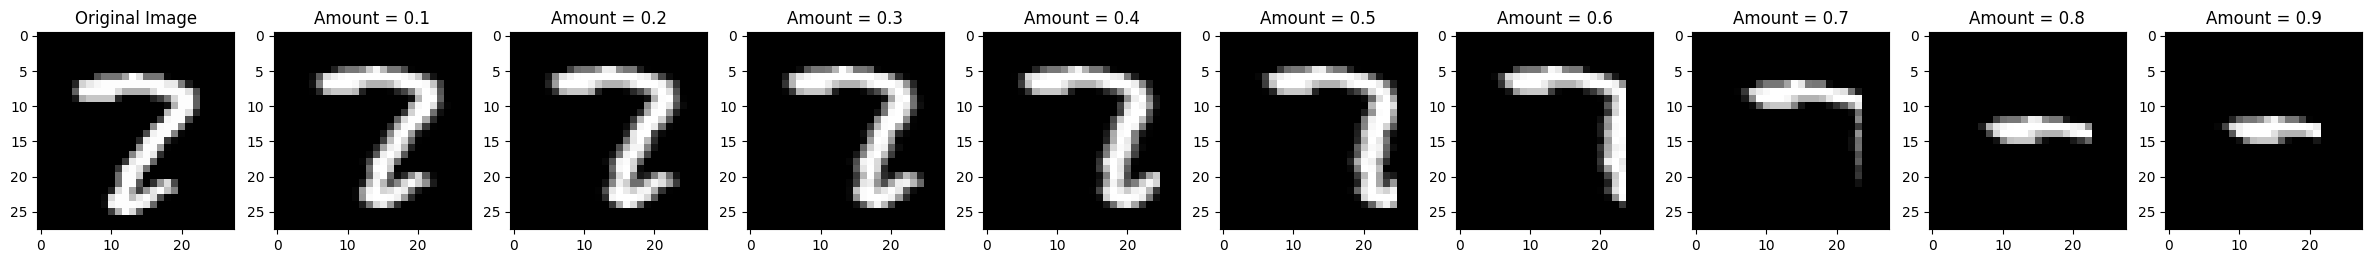

In [52]:
sample = train_X[10]
fig, axs = plt.subplots(1, 10, figsize=(30, 5))

axs[0].imshow(sample, cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(shear(sample, 0.1), cmap="gray")
axs[1].set_title("Amount = 0.1")

axs[2].imshow(shear(sample, 0.2), cmap="gray")
axs[2].set_title("Amount = 0.2")

axs[3].imshow(shear(sample, 0.3), cmap="gray")
axs[3].set_title("Amount = 0.3")

axs[4].imshow(shear(sample, 0.4), cmap="gray")
axs[4].set_title("Amount = 0.4")

axs[5].imshow(shear(sample, 0.5), cmap="gray")
axs[5].set_title("Amount = 0.5")

axs[6].imshow(shear(sample, 0.6), cmap="gray")
axs[6].set_title("Amount = 0.6")

axs[7].imshow(shear(sample, 0.7), cmap="gray")
axs[7].set_title("Amount = 0.7")

axs[8].imshow(shear(sample, 0.8), cmap="gray")
axs[8].set_title("Amount = 0.8")

axs[9].imshow(shear(sample, 0.9), cmap="gray")
axs[9].set_title("Amount = 0.9")

plt.show()

We have took the digit **2** as a sample from dataset and applied various shear values ranging from **0.1 to 0.9** and finally obtained the images of samples by the **shear argumentation** by using above **shear()** function.

In [54]:
def augShear(sample, shearconstraint):
    if shearconstraint == 0:
        return sample
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)
    amt = rng.random(len(sample))
    amt = (amt - 0.5) * shearconstraint
    nsample = sample.copy()
    for ii in range(len(sample)):
        nsample[ii] = shear(sample[ii], amt[ii])
    return np.squeeze(nsample)

This **augShear()** function takes **sample** and **shearconstrain**t as parameter and returns the **argumented image**s within the argumented **shear limit**.

In [55]:
shearconstraints = [
    0,
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.9,
    1.0,
    1.1,
    1.2,
    1.3,
    1.4,
    1.5,
    1.6,
    1.7,
    1.8,
    1.9,
    2.0,
    2.1,
    2.2,
    2.3,
    2.4,
    2.5,
]
accuracies = np.zeros(
    len(shearconstraints), dtype=float
)

for ii in range(len(shearconstraints)):
    augdata = train_X
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augShear(train_X, shearconstraints[ii]))
        )
        auglabel = np.concatenate(
            (auglabel, train_y)
        )

    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        "Accuracy after shear augmentation constrained by",
        shearconstraints[ii],
        "is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )

Accuracy after shear augmentation constrained by 0 is 64.72 %
Accuracy after shear augmentation constrained by 0.1 is 62.67 %
Accuracy after shear augmentation constrained by 0.2 is 62.7 %
Accuracy after shear augmentation constrained by 0.3 is 63.56 %
Accuracy after shear augmentation constrained by 0.4 is 64.8 %
Accuracy after shear augmentation constrained by 0.5 is 65.31 %
Accuracy after shear augmentation constrained by 0.6 is 66.21000000000001 %
Accuracy after shear augmentation constrained by 0.7 is 67.05 %
Accuracy after shear augmentation constrained by 0.8 is 66.09 %
Accuracy after shear augmentation constrained by 0.9 is 65.44 %
Accuracy after shear augmentation constrained by 1.0 is 64.67 %
Accuracy after shear augmentation constrained by 1.1 is 66.03999999999999 %
Accuracy after shear augmentation constrained by 1.2 is 64.53999999999999 %
Accuracy after shear augmentation constrained by 1.3 is 66.12 %
Accuracy after shear augmentation constrained by 1.4 is 64.17 %
Accuracy

We have obtained **most accuracy** incase of shear argumentation **limit** is **0.7** which is of **67.05%**

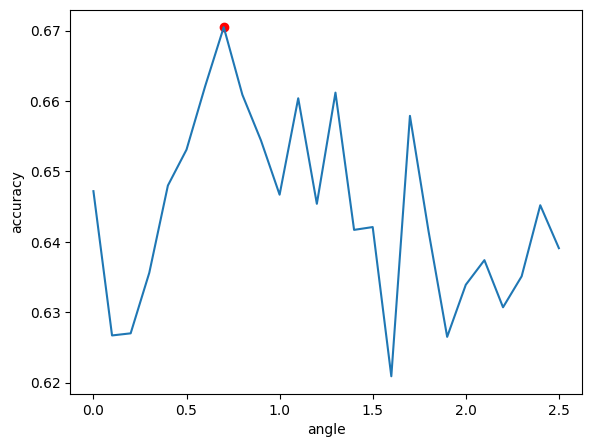

In [56]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(shearconstraints, accuracies)
ax.set_xlabel("angle")
ax.set_ylabel("accuracy")

maxind = np.argmax(accuracies)
plt.scatter(shearconstraints[maxind], accuracies[maxind], c="red")

From the plot also we have obtained **most accuracy** with **shear limit**-**0.7**

Now, Let us go through Argumentation which comprises **both shear** and **rotation**.

The function **augRotateShear()** takes
**sample**,
**angleconstraint**,
**shearconstraint** as parameters

Steps:
**Ensure 3D** Format,
**Generate** Random Amounts,
**Apply** Transformations,
**Return** Augmented Samples



In [57]:
def augRotateShear(sample, angleconstraint, shearconstraint):
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)
    amt = rng.random(len(sample))
    amt = (amt - 0.5) * shearconstraint
    angle = rng.random(len(sample))
    angle = (angle - 0.5) * angleconstraint
    nsample = sample.copy()
    for ii in range(len(sample)):
        nsample[ii] = rotate(
            shear(sample[ii], amt[ii]), angle[ii]
        )
    return np.squeeze(nsample)

In [58]:
shearconstraints = [
    0,
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.9,
    1.0,
    1.1,
    1.2,
    1.3,
    1.4,
    1.5,
    1.6,
    1.7,
    1.8,
]
angleconstraints = [0, 10, 20, 30, 40, 50, 60,70]
hyp = cartesian((shearconstraints, angleconstraints))

accuracies = np.zeros(len(hyp), dtype=float)

for ii in range(len(hyp)):
    augdata = train_X
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augRotateShear(train_X, hyp[ii][0], hyp[ii][1]))
        )
        auglabel = np.concatenate(
            (auglabel, train_y)
        )

    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        "Accuracy after augmentation shear:",
        hyp[ii][0],
        "angle:",
        hyp[ii][1],
        "is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )

Accuracy after augmentation shear: 0.0 angle: 0.0 is 63.32 %
Accuracy after augmentation shear: 0.0 angle: 10.0 is 61.75000000000001 %
Accuracy after augmentation shear: 0.0 angle: 20.0 is 63.36000000000001 %
Accuracy after augmentation shear: 0.0 angle: 30.0 is 62.41 %
Accuracy after augmentation shear: 0.0 angle: 40.0 is 64.05 %
Accuracy after augmentation shear: 0.0 angle: 50.0 is 61.39 %
Accuracy after augmentation shear: 0.0 angle: 60.0 is 63.06 %
Accuracy after augmentation shear: 0.0 angle: 70.0 is 62.64999999999999 %
Accuracy after augmentation shear: 0.1 angle: 0.0 is 63.339999999999996 %
Accuracy after augmentation shear: 0.1 angle: 10.0 is 62.580000000000005 %
Accuracy after augmentation shear: 0.1 angle: 20.0 is 60.089999999999996 %
Accuracy after augmentation shear: 0.1 angle: 30.0 is 63.12 %
Accuracy after augmentation shear: 0.1 angle: 40.0 is 63.74999999999999 %
Accuracy after augmentation shear: 0.1 angle: 50.0 is 61.89 %
Accuracy after augmentation shear: 0.1 angle: 6

We have obtained most accuracy with **angle** : **10.0** and **shear limit**: **1.4** which is of **65.05%**

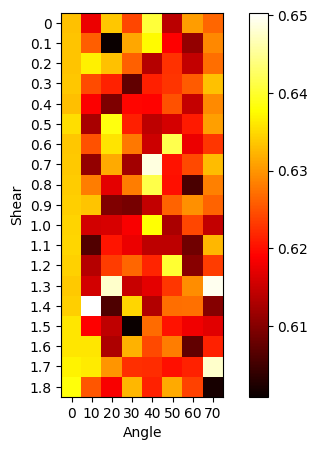

In [59]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
im = ax.imshow(
    accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap="hot"
)
ax.set_xlabel("Angle")
ax.set_ylabel("Shear")
ax.set_xticks(np.arange(len(angleconstraints)))
ax.set_xticklabels(angleconstraints)
ax.set_yticks(np.arange(len(shearconstraints)))
ax.set_yticklabels(shearconstraints)
plt.colorbar(im)

From the **plot** we can say that the best accuracy is **65.05%** when **angle:10** and **shear limit:1.4**.But when the **angle** is **0** we have tendency towards **most accuracy cases**.